In [1]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install mlxtend

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('C:/Users/91940/Downloads/GroceryStoreDataSet.csv', names=['products'])

In [5]:
df=data

In [6]:
data

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [7]:
data.columns

Index(['products'], dtype='object')

In [8]:
data.columns

Index(['products'], dtype='object')

In [9]:
data = list(df["products"].apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [10]:
from mlxtend.preprocessing import TransactionEncoder

In [11]:
te = TransactionEncoder()
te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns=te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [12]:
from mlxtend.frequent_patterns import apriori

In [13]:
df1 = apriori(df,min_support=0.01,use_colnames=True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
...,...,...
78,0.05,"(BISCUIT, TEA, BREAD, MAGGI)"
79,0.10,"(BISCUIT, CORNFLAKES, COCK, COFFEE)"
80,0.05,"(JAM, MILK, BREAD, MAGGI)"
81,0.05,"(JAM, TEA, BREAD, MAGGI)"


In [15]:
df1.sort_values(by="support",ascending=False)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
...,...,...
55,0.05,"(BISCUIT, CORNFLAKES, MILK)"
57,0.05,"(BOURNVITA, SUGER, BREAD)"
17,0.05,"(BISCUIT, SUGER)"
37,0.05,"(CORNFLAKES, MAGGI)"


In [16]:
df1['length']=df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
...,...,...,...
78,0.05,"(BISCUIT, TEA, BREAD, MAGGI)",4
79,0.10,"(BISCUIT, CORNFLAKES, COCK, COFFEE)",4
80,0.05,"(JAM, MILK, BREAD, MAGGI)",4
81,0.05,"(JAM, TEA, BREAD, MAGGI)",4


In [17]:
df1[(df1['length']==2) & (df1['support']>0.05)]

,support,itemsets,length
11,0.20,"(BISCUIT, BREAD)",2
12,0.10,"(BISCUIT, COCK)",2
13,0.10,"(BISCUIT, COFFEE)",2
14,0.15,"(BISCUIT, CORNFLAKES)",2
15,0.10,"(BISCUIT, MAGGI)",2
16,0.10,"(BISCUIT, MILK)",2
18,0.10,"(BISCUIT, TEA)",2
19,0.15,"(BOURNVITA, BREAD)",2
21,0.10,"(BOURNVITA, SUGER)",2
22,0.10,"(BOURNVITA, TEA)",2


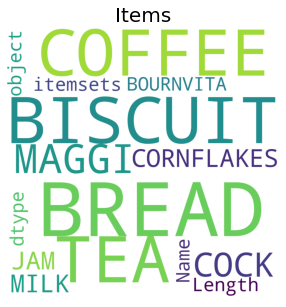

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud


plt.rcParams['figure.figsize'] = (12,5)
wordcloud = WordCloud(background_color = 'white', width = 1200, height = 1200, max_words = 121).generate(str(df1['itemsets']))
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Items',fontsize = 20)
plt.show()